In [1]:
def return_2df_parameters(parameters_file : str):
    with open(parameters_file, 'r') as f:
        f.readline()
        sizeof_float = (int)(f.readline())
        f.readline()
        TIME_dt = f.readline().split(' ')
        TIME = (int)(TIME_dt[0])
        dt = (float)(TIME_dt[1])
        f.readline()
        SIZE = f.readline().split(' ')
        SIZE_X = (int)(SIZE[0])
        SIZE_Y = (int)(SIZE[1])
        DTS = (int)(SIZE[2])
        return sizeof_float, TIME, dt, DTS, SIZE_X, SIZE_Y

In [2]:
import os
import sys
import numpy as np

        
def set_fap_data(file_to_read : str, field : list, sizeof_float : int):
    dtype = np.float32

    with open(file_to_read, 'br') as f:
        temp = np.fromfile(f, dtype=dtype, count=int(TIME))
        np.copyto(field, temp)
        
def set_2df_frame(t : int, field, field_to_read : str, sizeof_float : int, SIZE_X : int, SIZE_Y : int):
    dtype = np.float32
    
    with open(field_to_read, 'br') as f:
        f.seek((t*SIZE_X*SIZE_Y)*sizeof_float, os.SEEK_SET)
        temp = np.fromfile(f, dtype=dtype, count=SIZE_X*SIZE_Y)
        np.copyto(field, temp.reshape(SIZE_Y, SIZE_X))


In [3]:
import matplotlib.pyplot as plt


def set_imshow(subplot, Field: list, cmap_: str, v : tuple, SIZE_X : int, SIZE_Y : int):
    return subplot.imshow(
        Field[SXB:SXE,SYB:SYE],
        cmap = plt.get_cmap(cmap_),
        interpolation="gaussian",
        origin='lower',
        extent=(SXB,SXE,SYB,SYE),
        vmin=v[0], vmax=v[1],
    )


In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

tick_size=14

def set_colorbar(mappable, vmin_vmax):
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.05)
    cbar = fig.colorbar(mappable,
                       orientation="vertical",
                       cax=cax)
    cbar.set_ticks(list(np.linspace(vmin_vmax[0], vmin_vmax[1], num=3)))
    cbar.ax.tick_params(labelsize=tick_size)
    plt.sca(last_axes)
    return cbar


In [5]:
def set_fap_plot(field : dict):
    
    for name in field.keys():
        
        f = field[ name ]
        
        if ( '_s' not in name ):
            set_fap_data( f['file_to_read'], f['data'], sizeof_float )
        else:
            f_s = field[name[:-2]]
            f['data'] = (f_s['data'])[ int((f['t_range'])[0]) : int((f['t_range'])[-1]+1) ]

In [17]:
def draw_a_whole_plot(fig, len_field, axes, field : dict):    
    
    for name in field.keys():
        
        f = field[ name ]
        
        if (len_field == 1):
            ax = axes
        else:
            ax = axes[ f['axes_position'] ]
            
        ax.set_title( f['axes_name'], fontsize=title_fontsize )
        if ( '_s' not in name ):
            ax.plot( (f['t_range'])*dt, f['data'], color=f['color'] )
            ax.set_xlabel( f['xlabel'], fontsize=labels_fontsize )
            ax.set_ylabel( f['ylabel'], fontsize=labels_fontsize )
            ax.tick_params(axis='both',which='major',labelsize=tick_size)

        else:
            #f_s = field[name[:-2]]
            #axes[ f_s['axes_position'] ].plot( (f['t_range'])*dt, f['data'], color=f['color'] )
            
            #ax = axes #[ f['axes_position'] ]
            ax.plot( (f['t_range'])*dt, f['data'], color=f['color'] )
            #ax.set_xlabel( f['xlabel'], fontsize=labels_fontsize )
            #ax.set_ylabel( f['ylabel'], fontsize=labels_fontsize )
            #ax.tick_params(axis='both',which='major',labelsize=tick_size)

            
import matplotlib.pyplot as plt
import numpy as np


def set_whole_ax(axes, cbars : list, ddata_name : list, ddata_enum : dict, SIZE_X, SIZE_Y,
                 current_shape_is_shown = False):
    
    ax = axes[ ddata_name[ddata_enum['axes_position']] ]
    
    ax.set_title( ddata_name[ ddata_enum['axes_name'] ], fontsize=title_fontsize)
    ax.set_xlabel( ddata_name[ ddata_enum['xlabel'] ], fontsize=labels_fontsize )
    ax.set_ylabel( ddata_name[ ddata_enum['ylabel'] ], fontsize=labels_fontsize )
    ax.tick_params(axis='both',which='major',labelsize=tick_size)
    ax.set_xticks(list(np.linspace(SXB, SXE, num=5)))
    ax.set_yticks(list(np.linspace(SYB, SYE, num=5)))
    
    
    im_ = set_imshow(ax,
        ddata_name[ddata_enum['frame_data']],
        ddata_name[ddata_enum['colormap']],
        ddata_name[ddata_enum['vmin_vmax']],
        SIZE_X, SIZE_Y)
        
    cbars.append(set_colorbar(im_, ddata_name[ddata_enum['vmin_vmax']]))    

In [7]:
import math
import numpy as np


def set_cylindrical_components(field : str, ddata : dict, ddata_enum : dict, SIZE_X : int, SIZE_Y : int):
    
    fr   = [list(np.zeros(SIZE_X)) for i in range(SIZE_Y)]
    fphi = [list(np.zeros(SIZE_X)) for i in range(SIZE_Y)]
    
    fx_ = field + "x"
    fy_ = field + "y"
    fd_ = ddata_enum['frame_data']
    
    fx = ((ddata[fx_])[fd_])
    fy = ((ddata[fy_])[fd_])
    
    an_ = ddata_enum['axes_name']
    
    (ddata[fx_])[an_] = "$" + field[0] + "_r^" + field[1] + "\,(\,x,~y\,)$"
    (ddata[fy_])[an_] = "$" + field[0] + "_{\phi}^" + field[1] + "\,(\,x,~y\,)$"
    
    for i in range(0, SIZE_Y):
        for j in range(0, SIZE_X):
            
            y = i+0.5 - SIZE_Y/2
            x = j+0.5 - SIZE_X/2    
            r = math.sqrt(x*x + y*y)
            
            if (r != 0):
                fr[i][j]   = +fx[i][j]*(x/r) + fy[i][j]/2*(y/r)
                fphi[i][j] = -fx[i][j]*(y/r) + fy[i][j]/2*(x/r)
            else: 
                fr[i][j]   = ( fx[i][j] + fy[i][j] )/2
                fphi[i][j] = 0
    
            fx[i][j] = fr[i][j]   
            fy[i][j] = fphi[i][j]
        
        
def set_decart_components(field : str, ddata : dict, ddata_enum : dict, SIZE_X : int, SIZE_Y : int):
    
    fx = [list(np.zeros(SIZE_X)) for i in range(SIZE_Y)]
    fy = [list(np.zeros(SIZE_X)) for i in range(SIZE_Y)]
    
    fr_   = field + "x"
    fphi_ = field + "y"
    fd_   = ddata_enum['frame_data']
    
    fr = ((ddata[fr_])[fd_])
    fphi = ((ddata[fphi_])[fd_])
    
    an_ = ddata_enum['axes_name']
    
    (ddata[fr_])[an_]   = "$" + field + "_x\,(\,x,~y\,)$"
    (ddata[fphi_])[an_] = "$" + field + "_y\,(\,x,~y\,)$"
    
    for i in range(0, SIZE_Y):
        for j in range(0, SIZE_X):
            
            y = i+0.5 - SIZE_Y/2
            x = j+0.5 - SIZE_X/2    
            r = math.sqrt(x*x + y*y)
            
            if (r != 0):
                fx[i][j] = +fr[i][j]*(x/r) - fphi[i][j]*(y/r)
                fy[i][j] = +fr[i][j]*(y/r) + fphi[i][j]*(x/r)
            else: 
                fx[i][j]   = ( fr[i][j] + fphi[i][j] )/2
                fy[i][j] = 0
    
            fr[i][j]   = fx[i][j]   
            fphi[i][j] = fy[i][j]

In [8]:
def clear_whole_figure(axes, cbars, nrows, ncols):
    for i in range(nrows):
        for j in range(ncols):
            axes[i,j].cla()
    
    for i in range(len(cbars)):
        cbars[i].remove()

d:\python\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  This is separate from the ipykernel package so we can avoid doing imports until


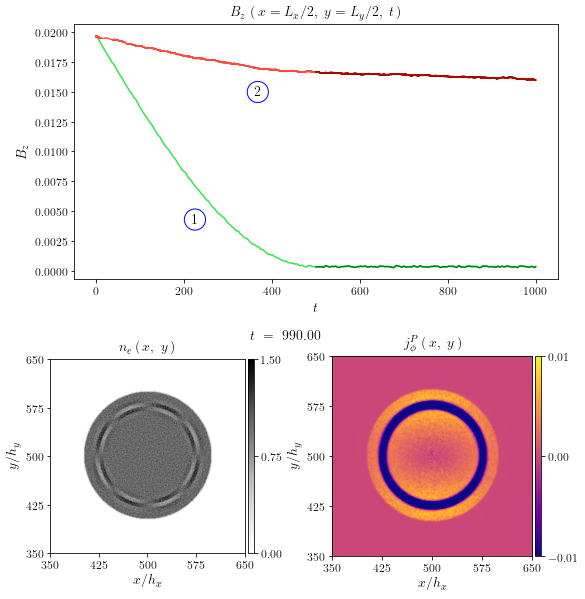

In [43]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'''

\usepackage[english,russian]{babel}

''')

title_fontsize=14
labels_fontsize=14
tick_size=12


import numpy as np

sizeof_float, TIME, dt, DTS, SIZE_X, SIZE_Y = return_2df_parameters('./CVAC/fields/whole_field/parameters.txt')

TINJ = 25000
TINJ_ = int(25000)


fpdata = {
    'Bzv'   : { 't_range': np.asarray(range(0, TIME)),
               'data': np.zeros(int(TIME), dtype=float),
               'file_to_read' : './CVAC/fields/field_at_point/Bz.bin',
               'axes_position' : (0,0),
               'axes_name': '$B_z~(\,x = L_x/2,~y = L_y/2,~t\,)$',
               'ylabel': '$B_z$',
               'xlabel': '$t$',
               'color': '#39E24D',
             },
    'Bzv_s' : { 't_range': np.asarray(range(TINJ, TIME)),
               'data': np.zeros(int(TIME), dtype=float),
               'axes_position' : (0,0),
               'axes_name': '$B_z~(\,x = L_x/2,~y = L_y/2,~t\,)$', 
               'ylabel': '$B_z$',
               'xlabel': '$t$',  
               'color': '#008110',
             },
    'Bzp'   : { 't_range': np.asarray(range(0, TIME)),
               'data': np.zeros(int(TIME), dtype=float),
               'file_to_read' : './CPLSM/fields/field_at_point/Bz.bin',
               'axes_position' : (0,0),
               'axes_name': '$B_z~(\,x = L_x/2,~y = L_y/2,~t\,)$',
               'ylabel': '$B_z$',
               'xlabel': '$t$',
               'color': '#FF4940',
             },
    'Bzp_s' : { 't_range': np.asarray(range(TINJ, TIME)),
               'data': np.zeros(int(TIME), dtype=float),
               'axes_position' : (0,0),
               'axes_name': '$B_z~(\,x = L_x/2,~y = L_y/2,~t\,)$', 
               'ylabel': '$B_z$',
               'xlabel': '$t$',  
               'color': '#A60800',
             },
}





ddata_enum = {
    
    'file_to_read':     0,
    'frame_data':       1,
    'axes_position':    2,
    'axes_name':        3,
    'xlabel':           4,
    'ylabel':           5,
    'vmin_vmax':        6,
    'colormap':         7,

}


nrows = 2
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8.27,11.69))

box = {
    'facecolor':'w',
    'edgecolor':'g',
    'boxstyle':'circle',
    'linewidth':'3',
}

box1 = {
    'facecolor':'w',
    'edgecolor':'b',
    'boxstyle':'circle',
    'linewidth':'1',
}


SXB = 350
SXE = 650
SYB = 350
SYE = 650

fdata = {
    
    #'name': ["file.bin", [frame_data], (axes_position), "axes_name", "xlabel", "ylabel" (vmin, vmax), "colormap"]
    #'jVx': [ "./DVAC/fields/whole_field/jx.bin", np.zeros((SIZE_Y, SIZE_X)), (0,1), "$j_x\,(\,x,~y\,)$", "$x/h_x$", "$y/h_y$", (-1e-2, 1e-2), "plasma" ],
    #'jVy': [ "./DVAC/fields/whole_field/jy.bin", np.zeros((SIZE_Y, SIZE_X)), (0,1), "$j_y\,(\,x,~y\,)$", "$x/h_x$", "$y/h_y$", (-1e-2, 1e-2), "plasma" ], 
    #'EVx': [ "./DVAC/fields/whole_field/Ex.bin", np.zeros((SIZE_Y, SIZE_X)), (0,0), "$E_x\,(\,x,~y\,)$", "$x/h_x$", "$y/h_y$", (-1e-2, 1e-2), "plasma" ],
    #'EVy': [ "./DVAC/fields/whole_field/Ey.bin", np.zeros((SIZE_Y, SIZE_X)), (0,0), "$E_y\,(\,x,~y\,)$", "$x/h_x$", "$y/h_y$", (-1e-2, 1e-2), "plasma" ],
    
    'jPx': [ "./CPLSM/fields/whole_field/jx.bin", np.zeros((SIZE_Y, SIZE_X)), (1,1), "$j_x\,(\,x,~y\,)$", "$x/h_x$", "$y/h_y$", (-1e-2, 1e-2), "plasma" ],
    'jPy': [ "./CPLSM/fields/whole_field/jy.bin", np.zeros((SIZE_Y, SIZE_X)), (1,1), "$j_y\,(\,x,~y\,)$", "$x/h_x$", "$y/h_y$", (-1e-2, 1e-2), "plasma" ],
    #'EPy': [ "./DPLSM/dl/fields/whole_field/Ey.bin", np.zeros((SIZE_Y, SIZE_X)), (0,1), "$E_y\,(\,x,~y\,)$", "$x/h_x$", "$y/h_y$", (-5e-3, 5e-3), "plasma" ],
    #'EPx': [ "./DPLSM/dl/fields/whole_field/Ex.bin", np.zeros((SIZE_Y, SIZE_X)), (0,1), "$E_x\,(\,x,~y\,)$", "$x/h_x$", "$y/h_y$", (-5e-3, 5e-3), "plasma" ],
    #'BPz': [ "./DPLSM/dl/fields/whole_field/Bz.bin", np.zeros((SIZE_Y, SIZE_X)), (1,1), "$B_z^P\,(\,x,~y\,)$", "$x/h_x$", "$y/h_y$", (0, 0.02), "plasma" ],
    
    #'ne': [ "./DVAC/Electrons/density/density.bin", np.zeros((SIZE_Y, SIZE_X)), (1,1), "$n_e\,(\,x,~y\,)$", "$x/h_x$", "$y/h_y$", (0, 2), "Greys"], 
    'ne': [ "./CPLSM/Electrons/density/density.bin", np.zeros((SIZE_Y, SIZE_X)), (1,0), "$n_e\,(\,x,~y\,)$", "$x/h_x$", "$y/h_y$", (0, 1.5), "Greys"], 
    #'off': [ "", [], (1,1), "", "$", (), ""], 

}



t = int(49999/DTS)

imshows = []
cbars = []
    
for name in fdata.keys():
    if (name[:3] != 'off'):
        set_2df_frame(t, fdata[name][ddata_enum['frame_data']],
        fdata[name][ddata_enum['file_to_read']],
        sizeof_float, SIZE_X, SIZE_Y)
    else:
        continue

set_fap_plot(fpdata)
set_cylindrical_components('jP', fdata, ddata_enum, SIZE_X, SIZE_Y)
#set_cylindrical_components('EV', fdata, ddata_enum, SIZE_X, SIZE_Y)
#set_cylindrical_components('EP', fdata, ddata_enum, SIZE_X, SIZE_Y)

set_whole_ax(axes, cbars, fdata['ne'], ddata_enum, SIZE_X, SIZE_Y) 
set_whole_ax(axes, cbars, fdata['jPy'], ddata_enum, SIZE_X, SIZE_Y)
draw_a_whole_plot(fig, 3, axes, fpdata)
axes[ (0,1) ].axis("off")
    
axes[1,0].text(+1.03, 1.1, "$t~=~%.2f$" %(DTS*t*dt), transform=axes[1,0].transAxes, fontsize=title_fontsize)

'''
pos = axes[0,0].get_position()
pos.x0 = pos.x0 - 0.03 - 0.01
pos.x1 = pos.x1 - 0.03 - 0.01
axes[0,0].set_position(pos)
    
pos = axes[0,1].get_position()
pos.x0 = pos.x0 + 0.03 - 0.01
pos.x1 = pos.x1 + 0.03 - 0.01
axes[0,1].set_position(pos)
'''

pos = axes[1,0].get_position()
pos.x0 = pos.x0 - 0.03 #- 0.01
pos.x1 = pos.x1 - 0.03 - 0.01
pos.y0 = pos.y0 + 0.09
pos.y1 = pos.y1 + 0.09
axes[1,0].set_position(pos)
    
pos = axes[1,1].get_position()
pos.x0 = pos.x0 + 0.03 - 0.01
pos.x1 = pos.x1 + 0.03 - 0.01
pos.y0 = pos.y0 + 0.09
pos.y1 = pos.y1 + 0.09
axes[1,1].set_position(pos)


pos = axes[0,0].get_position()
pos.x0 = pos.x0 - 0.03 + 0.04
pos.x1 = pos.x1 + 0.43 + 0.04
pos.y0 = pos.y0 + 0.02 + 0.04
pos.y1 = pos.y1 - 0.02 + 0.04
axes[0,0].set_position(pos)

axes[0,0].text(+0.25, +0.22, '$1$', bbox=box1, horizontalalignment='center', color='black', transform=axes[0,0].transAxes, fontsize=title_fontsize)
axes[0,0].text(+0.38, +0.72, '$2$', bbox=box1, horizontalalignment='center', color='black', transform=axes[0,0].transAxes, fontsize=title_fontsize)
    
#axes[0,0].text(-0.05, 1.1, '$a$', bbox=box, horizontalalignment='center', color='black', transform=axes[0,0].transAxes, fontsize=title_fontsize)
#axes[1,0].text(-0.05, 1.1, '$b$', bbox=box, horizontalalignment='center', color='black', transform=axes[1,0].transAxes, fontsize=title_fontsize)
#axes[2,0].text(-0.02, 1.1, '$c$', bbox=box, horizontalalignment='center', color='black', transform=axes[2,0].transAxes, fontsize=title_fontsize)

#fig.savefig("./Presentation_C.pdf")
plt.show()

d:\python\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  This is separate from the ipykernel package so we can avoid doing imports until


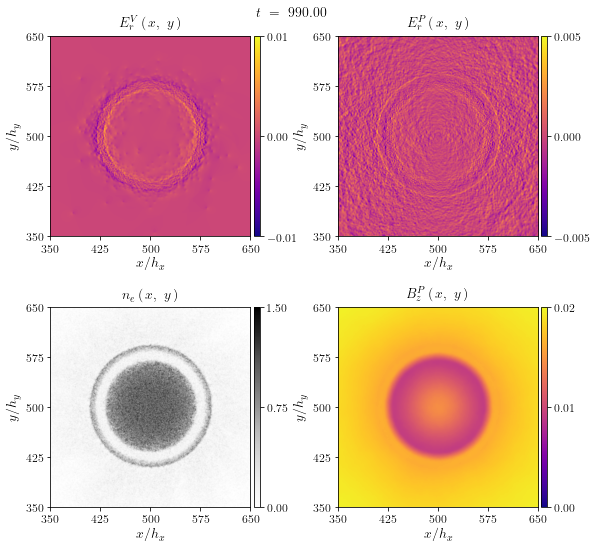